In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [16]:
light_blue = Image.open('/Users/calvinatkins/Downloads/light_blue.jpeg')
orange = Image.open('/Users/calvinatkins/Downloads/orange.jpeg')
red = Image.open('/Users/calvinatkins/Downloads/red.jpeg')
turquoise = Image.open('/Users/calvinatkins/Downloads/turquoise.jpeg')
sage = Image.open('/Users/calvinatkins/Downloads/sage.jpeg')

In [25]:
# Orange as an example:
image = red

# Convert the image to RGB mode
image = image.convert("RGB")

# Convert the image to a NumPy array
image_data = np.array(image)

855

In [26]:
# Getting pixels
pixels_test = list(image.getdata())

In [27]:
# ATTEMPTING TO REDUCE MEMORY REQUIREMENTS IN ORDER TO CLUSTER

from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

height, width, _ = image_data.shape
pixels = np.reshape(image_data, (height * width, 3))

# Dimensionality Reduction (PCA)
n_components = 3  # Example number of components
pca = PCA(n_components=n_components)
pixels_reduced = pca.fit_transform(pixels)

# sample pixels
sample_size = 13000  # Example sample size
sample_indices = np.random.choice(pixels_reduced.shape[0], size=sample_size, replace=False)
sample_pixels = pixels_reduced[sample_indices]


/var/folders/bh/s725mwjn6yv_jjc2dmb9c5th0000gn/T/ipykernel_23876/2485181002.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distances, method='complete')


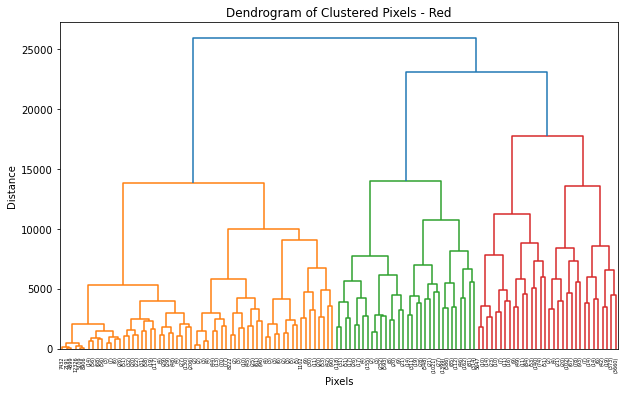

NameError: name 'Z' is not defined

In [28]:
# CLUSTERING TO FIND DENDROGRAM
pixels = sample_pixels

distances = pairwise_distances(pixels, metric='euclidean')

linkage_matrix = linkage(distances, method='complete')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=6)  # Example truncation at level 5
plt.xlabel('Pixels')
plt.ylabel('Distance')
plt.title('Dendrogram of Clustered Pixels - Red')
plt.show()